## Lab 12: Unsupervised Learning
Jack Krebsbach Math 313 



### 12.5.1  Principal Components Analysis

First we explore the ```USArrests```  data set.

In [4]:
## All of our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets  import get_rdataset 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from ISLP import load_data

In [5]:
## New imports needed
from sklearn.cluster import (KMeans,AgglomerativeClustering)
from scipy.cluster.hierarchy import  (dendrogram, cut_tree)
from ISLP.cluster import compute_linkage

There are 50 rows in this data set, which contain the states in alphabetical order.

In [6]:
USArrests = get_rdataset('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [7]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
# The variables have lots of different means.
USArrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [9]:
# We can compute statistics like variance on these features
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [10]:
# We can standardize the data.
scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)
USArrests_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

Once we scale the data we can now perform ```PCA``` on the data.

In [11]:
np.std(USArrests_scaled[:, 1])

1.0

In [12]:
## This uses the PCA package versus by hand
pcaUS = PCA()

In [13]:
pcaUS.fit(USArrests_scaled)

PCA()

In [14]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [15]:
scores = pcaUS.transform(USArrests_scaled)

#### Principal Component Loadings
The loadings of the principal component anlsysis can be extracted using ```.components_``` of the ```PCA``` analysis. Each row contains the PC loading vector.

In [42]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

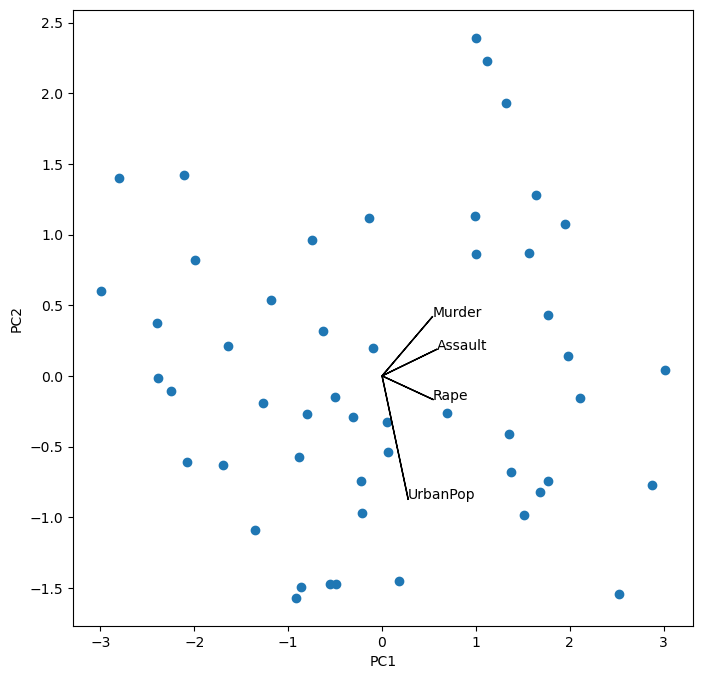

In [17]:
# Here we make the bi-plot manually as it is not a standard import from sklearn.

i, j = 0, 1 # which components
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i,k], pcaUS.components_[j,k])
    ax.text(pcaUS.components_[i,k], pcaUS.components_[j,k], USArrests.columns[k])

This figure is a reflection (through the ```y-axis```) from the book in figure 12.1. The PC are unique only up to sign change. Thus, we can replicate the figure by flipping the signs and can more clearly see the differences between loadings by increasing the length of the arrows.

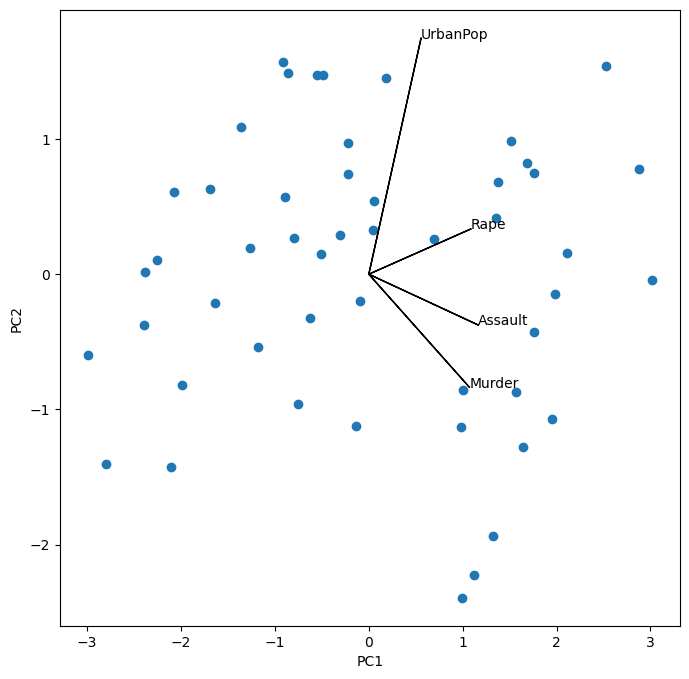

In [18]:
scale_arrow = s_ = 2
scores[:,1] *= -1
pcaUS.components_[1] *= -1 # flip the y-axis 
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1]) 
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i,k], s_*pcaUS.components_[ j,k])
    ax.text(s_*pcaUS.components_[i,k], s_*pcaUS.components_[j,k],
    USArrests.columns[k])

In [19]:
# We grab the standard deviations
scores.std(0, ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

What we are really after is how much variance each PC can explain, here we can find the explained variance by component. It is helpful to also find the ratio of explained variance to get a better of idea this.

In [20]:
pcaUS.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [21]:
pcaUS.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

The first principal component explains ```60%``` of the variance in the data. To visually see this we can plot it below.

In [22]:
%%capture
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
ticks = np.arange(pcaUS.n_components_)+1
ax = axes[0]
ax.plot(ticks,
pcaUS.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Principal Component'); ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
ax.set_xlabel('Principal Component'); ax.set_ylabel('Proportion of Variance Explained') 
ax.set_ylim([0,1])
ax.set_xticks(ticks)

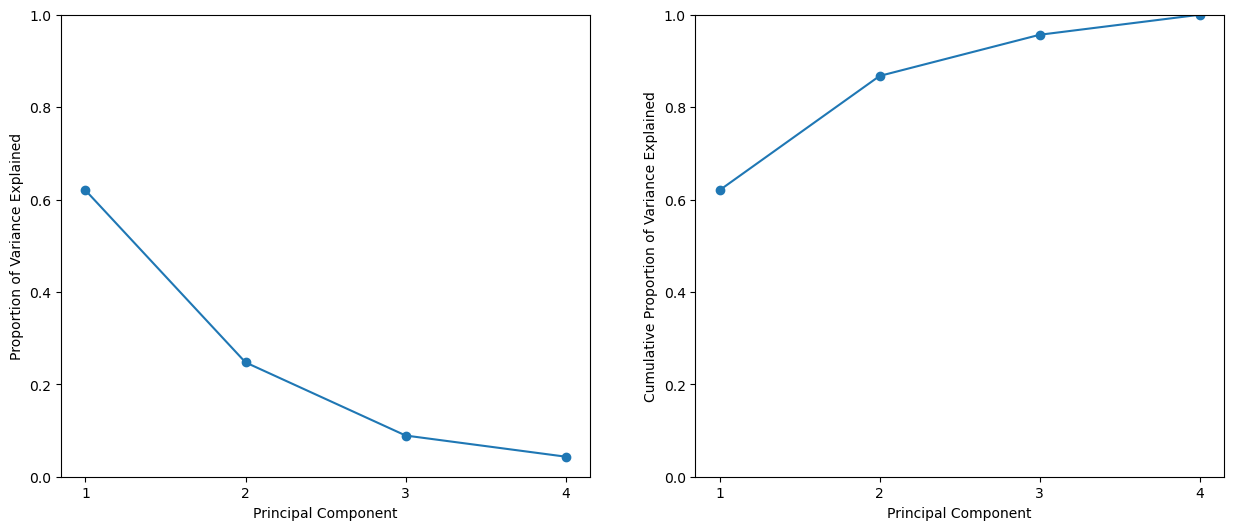

In [23]:
ax = axes[1] 
ax.plot(ticks,
pcaUS.explained_variance_ratio_.cumsum(),
marker='o')
ax.set_xlabel('Principal Component') 
ax.set_ylabel('Cumulative Proportion of Variance Explained') 
ax.set_ylim([0, 1])
ax.set_xticks(ticks) 
fig

In [24]:
a = np.array([1,2,8,-3])
np.cumsum(a)

array([ 1,  3, 11,  8])

### 12.5.2 Matrix Completion
Our goal in this section is to re-create the analysis of the data set in section 12.3. Here we use ```Singular Value Decomposition``` to solve for the principal components of the data.

In [25]:
X = USArrests_scaled
## Theses are the matrix that our matrix A can be decomposed into.
U, D, V = np.linalg.svd(X, full_matrices=False) 
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

In [26]:
#V is equivalent to the loading matrix from the PCA before! 
V

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [ 0.34123273,  0.26814843,  0.37801579, -0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [27]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

The matrix ```U``` is a standardized version of the PCA score matrix. The standardization involves scaling the columns to have sum-of-squares 1.

In [28]:
(U * D[None,:])[:3]

array([[-0.98556588, -1.13339238,  0.44426879,  0.15626714],
       [-1.95013775, -1.07321326, -2.04000333, -0.43858344],
       [-1.76316354,  0.74595678, -0.05478082, -0.83465292]])

In [29]:
scores[:3]

array([[ 0.98556588, -1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775, -1.07321326,  2.04000333, -0.43858344],
       [ 1.76316354,  0.74595678,  0.05478082, -0.83465292]])

Note: this section of the lab would be able to be done by just using the ```PCA()``` estimator but we are interested in using ```np.linalg.svd()``` to help us explore how matrix completion works.

We purposely omit 50 random entries in our matrix before implementing the algorithm from 12.1 for matrix completion.

In [30]:
n_omit = 20
np.random.seed(15)
r_idx = np.random.choice(np.arange(X.shape[0]), n_omit ,replace=False)
c_idx = np.random.choice(np.arange(X.shape[1]), n_omit , replace=True)
Xna = X.copy()
Xna[r_idx, c_idx] = np.nan

This function allows us to take in a matrix and return its estimation from SVD.

In [31]:
def low_rank(X, M=1):
    U, D, V = np.linalg.svd(X)
    L = U[:,:M] * D[None,:M] 
    return L.dot(V[:M])

Here we replace the missing values (the ones we purposely got rid of) with the means of the other entries in the column.

The matrix ```imiss``` is a logical matrix having the same dimensions of ```Xna```.  

Step 2A involved approximating ```Xhat``` with our function defined ```low_rank()```. Set 2B we use ```Xapp``` to update the estimates for the missing data. In step 3C we finally compute the relative error.

In [32]:
Xhat = Xna.copy()
Xbar = np.nanmean(Xhat, axis=0) 
Xhat[r_idx, c_idx] = Xbar[c_idx]

In [33]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)

This process actually only takes eight iterations as after that the relative error falls below ```1e-7```.


In [34]:
while rel_err > thresh: 
    count += 1
    # Step 2(a)
    Xapp = low_rank(Xhat, M=1)
    # Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
    # Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}".format(count, mss, rel_err))

Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


In [35]:
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]

0.7113567434297362

### 12.5.3 Clustering


#####  K-Means Clustering

We can use the estimator from the ```sklearn``` package to perform ```K-means``` clustering.

In [36]:
np.random.seed(0);
X = np.random.standard_normal((50,2)); X[:25,0] += 3;
X[:25,1] -= 4;

In [43]:
# This performs k-means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=2, n_init=20).fit(X)
# k-means with 5 clusters
kmeans_three_clsuters = KMeans(n_clusters=5, random_state=2, n_init=20).fit(X)

In [45]:
# It looks like we were able to split the data perfectly even though we did not have any labels!
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

It is easy to plot the observations in the following cell because they are already two-dimensional.

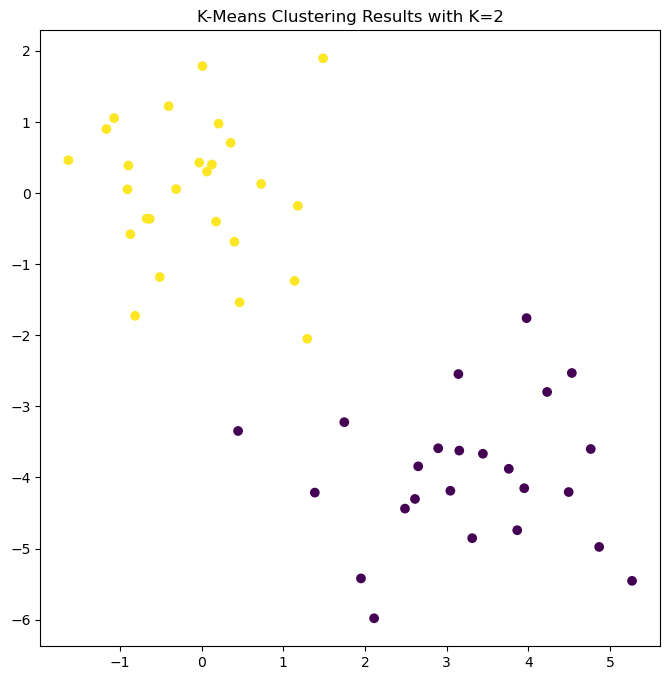

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_) 
ax.set_title("K-Means Clustering Results with K=2");

Next we try and cluster with K=3.

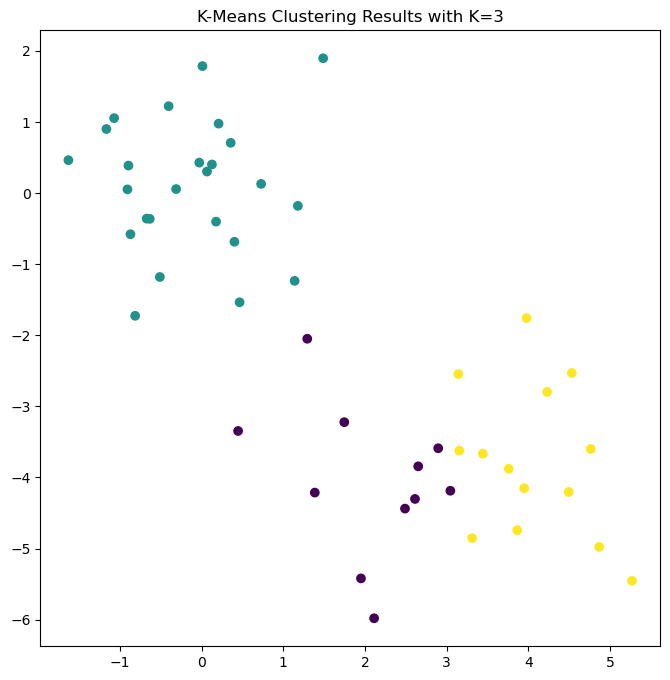

In [40]:
kmeans = KMeans(n_clusters=3, random_state=3,
n_init=20).fit(X) 
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_) 
ax.set_title("K-Means Clustering Results with K=3");

In [41]:
kmeans1 = KMeans(n_clusters=3, random_state=3,
n_init=1).fit(X) 
kmeans20 = KMeans(n_clusters=3, random_state=3,
n_init=20).fit(X);
kmeans1.inertia_, kmeans20.inertia_

(76.85131986999252, 75.06261242745384)


The inertia (which can be calculated with ```.interti_``` gives is the total within-cluster sum of squares. We seek to minimize this value with K-means clustering.

Some steps to take when we perform K-means are
- Use random multiple initial cluster assignments
- Use a random seed in the ```random_state``` argument for ```Kmeans()``` This is important so that you clan replicate the first step of the algorithm